In [73]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [74]:
df_beer = pd.read_csv('recipeData.csv', index_col='BeerID', encoding='latin1')

In [75]:
print(df_beer.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73861 entries, 1 to 73861
Columns: 22 entries, Name to UserId
dtypes: float64(13), int64(2), object(7)
memory usage: 13.0+ MB
None


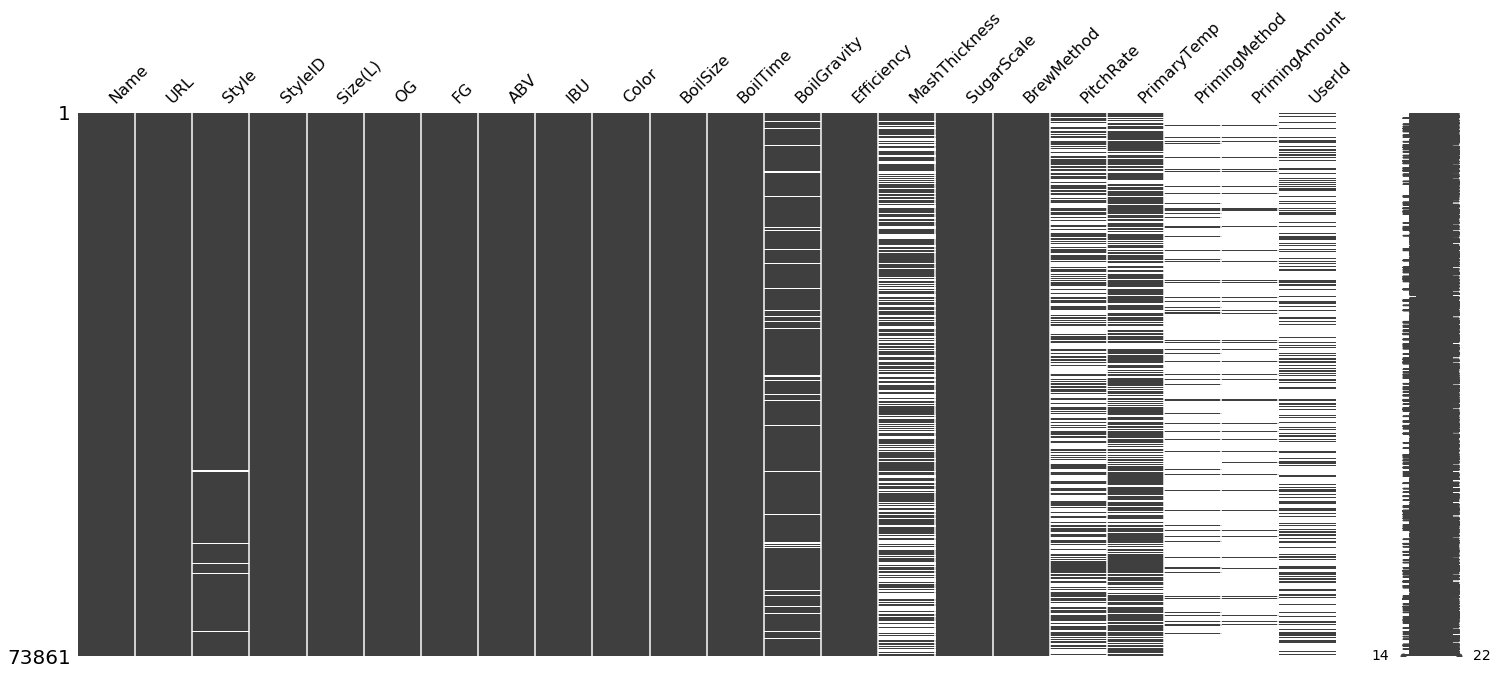

In [76]:
msno.matrix(df_beer.sample(len(df_beer)))

In [77]:
priming_nulo = df_beer['PrimingMethod'].isnull()
print('Priming Method é nulo em {} de {} linhas, ou seja, {} % do tempo.'.format(priming_nulo.sum(), len(df_beer), round((priming_nulo.sum()/len(df_beer))*100,2)))

Priming Method é nulo em 67095 de 73861 linhas, ou seja, 90.84 % do tempo.


In [78]:
df_beer.dtypes

Name              object
URL               object
Style             object
StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale        object
BrewMethod        object
PitchRate        float64
PrimaryTemp      float64
PrimingMethod     object
PrimingAmount     object
UserId           float64
dtype: object

In [79]:
df_beer['Size(L)'].describe()

count    73861.000000
mean        43.929775
std        180.373492
min          1.000000
25%         18.930000
50%         20.820000
75%         23.660000
max       9200.000000
Name: Size(L), dtype: float64

In [80]:
df_beer.drop('PrimingMethod', inplace=True, axis=1)

In [81]:
df_beer.drop('PrimingAmount', inplace=True, axis=1)

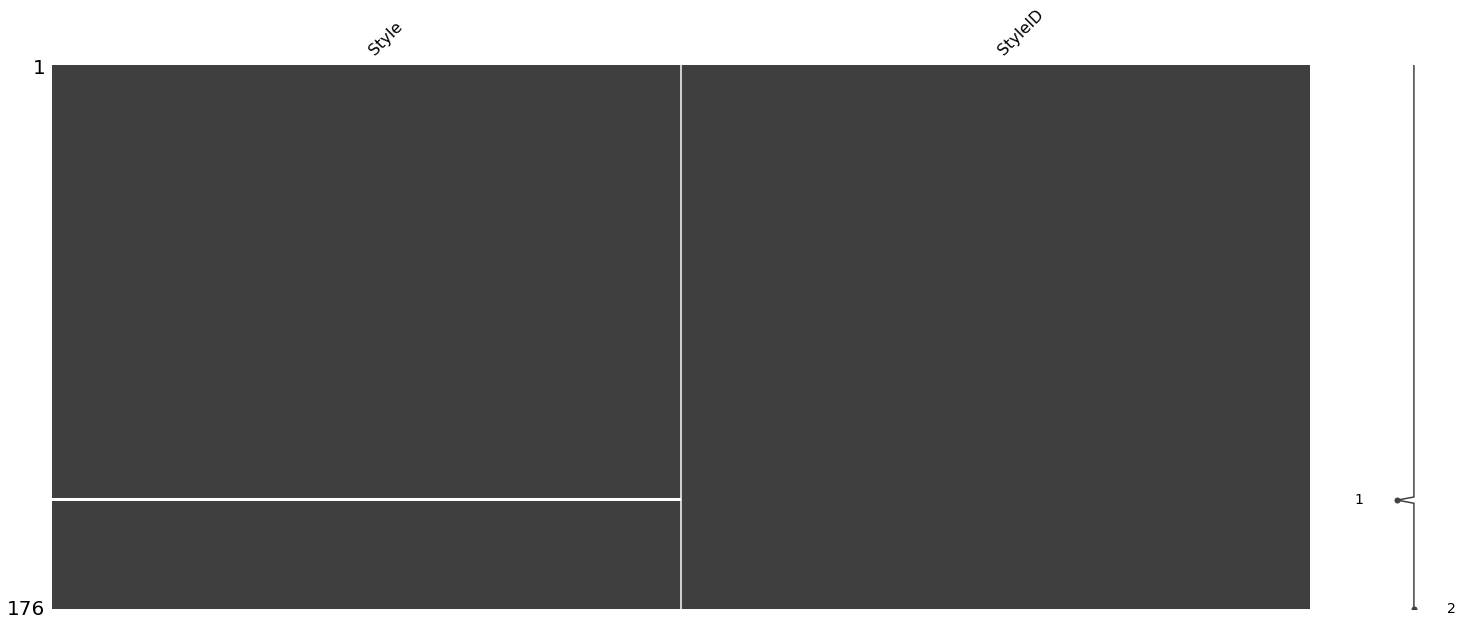

In [82]:
df_style = pd.read_csv('styleData.csv', index_col=False, encoding='latin1')
msno.matrix(df_style.sample(176))

In [83]:
# A String NaN significa nulo, como exemplo, utilizamos a coluna 'BoilGravity' 
# para mostrar que não é necessário ser tratado.

df_beer[df_beer['BoilGravity'].isnull()]

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,UserId
BeerID,,,,,,,,,,,,,,,,,,,,
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN
7,Russian River Pliny the Elder (original),/homebrew/recipe/view/37534/russian-river-plin...,Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,1051.0
12,Hop Notch Clone,/homebrew/recipe/view/10092/hop-notch-clone,American IPA,7,15.14,1.066,1.015,6.62,111.00,14.26,11.36,90,NaN,70.0,NaN,Specific Gravity,BIAB,NaN,NaN,NaN
13,Racer 5 IPA Clone,/homebrew/recipe/view/23246/racer-5-ipa-clone,American IPA,7,20.82,1.073,1.019,7.07,69.72,6.28,28.39,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN
16,Pilsner Urquell BYO clone,/homebrew/recipe/view/3000/pilsner-urquell-byo...,Bohemian Pilsener,31,41.64,1.051,1.013,4.92,36.80,3.61,49.21,60,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN
23,Brooklyn Sorachi Ace,/homebrew/recipe/view/190892/brooklyn-sorachi-ace,Saison,134,18.93,1.082,1.013,9.10,0.00,4.10,21.58,60,NaN,72.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN
26,Dale's Pale Ale Clone,/homebrew/recipe/view/190430/dale-s-pale-ale-c...,American Pale Ale,10,18.93,1.067,1.017,6.60,0.00,11.69,18.93,60,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN
32,Mosaic IPA,/homebrew/recipe/view/191545/mosaic-ipa,American IPA,7,18.93,1.074,1.018,7.24,0.00,7.68,22.71,60,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,35054.0


In [84]:
mt_nulo = df_beer['MashThickness'].isnull()
pr_nulo = df_beer['PitchRate'].isnull()

print('MashThickness é nulo em {} de {} linhas, ou seja, {} % do tempo.'.format(mt_nulo.sum(), len(df_beer), round((mt_nulo.sum()/len(df_beer))*100,2)))
print('\nPitchRate é nulo em {} de {} linhas, ou seja, {} % do tempo.'.format(pr_nulo.sum(), len(df_beer), round((pr_nulo.sum()/len(df_beer))*100,2)))

MashThickness é nulo em 29864 de 73861 linhas, ou seja, 40.43 % do tempo.

PitchRate é nulo em 39252 de 73861 linhas, ou seja, 53.14 % do tempo.


In [85]:
# df_beer[(df_beer['MashThickness'].isnull()) & (df_beer['PitchRate'].isnull()) & (df_beer['PrimaryTemp'].isnull()) & (df_beer['UserId'].isnull()) & (df_beer['BoilGravity'].isnull())]

In [86]:
df_beer['BrewLost'] = df_beer['OG'] - df_beer['FG']

In [87]:
df_beer.head(30)

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,UserId,BrewLost
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,116.0,0.042
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,955.0,0.062
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,0.045
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,0.044
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,18325.0,0.050
6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,...,70,1.047,79.0,NaN,Specific Gravity,All Grain,1.00,NaN,5889.0,0.042
7,Russian River Pliny the Elder (original),/homebrew/recipe/view/37534/russian-river-plin...,Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,6.33,...,90,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,1051.0,0.054
8,Spotted Clown (New Glarus Spotted Cow clone),/homebrew/recipe/view/672/spotted-clown-new-gl...,Cream Ale,45,20.82,1.054,1.014,5.36,19.97,5.94,...,75,1.040,70.0,1.40,Specific Gravity,All Grain,NaN,NaN,116.0,0.040
9,Chocolate Vanilla Porter,/homebrew/recipe/view/29265/chocolate-vanilla-...,Robust Porter,129,22.71,1.060,1.016,5.77,31.63,34.76,...,75,1.042,73.0,NaN,Specific Gravity,All Grain,NaN,NaN,116.0,0.044


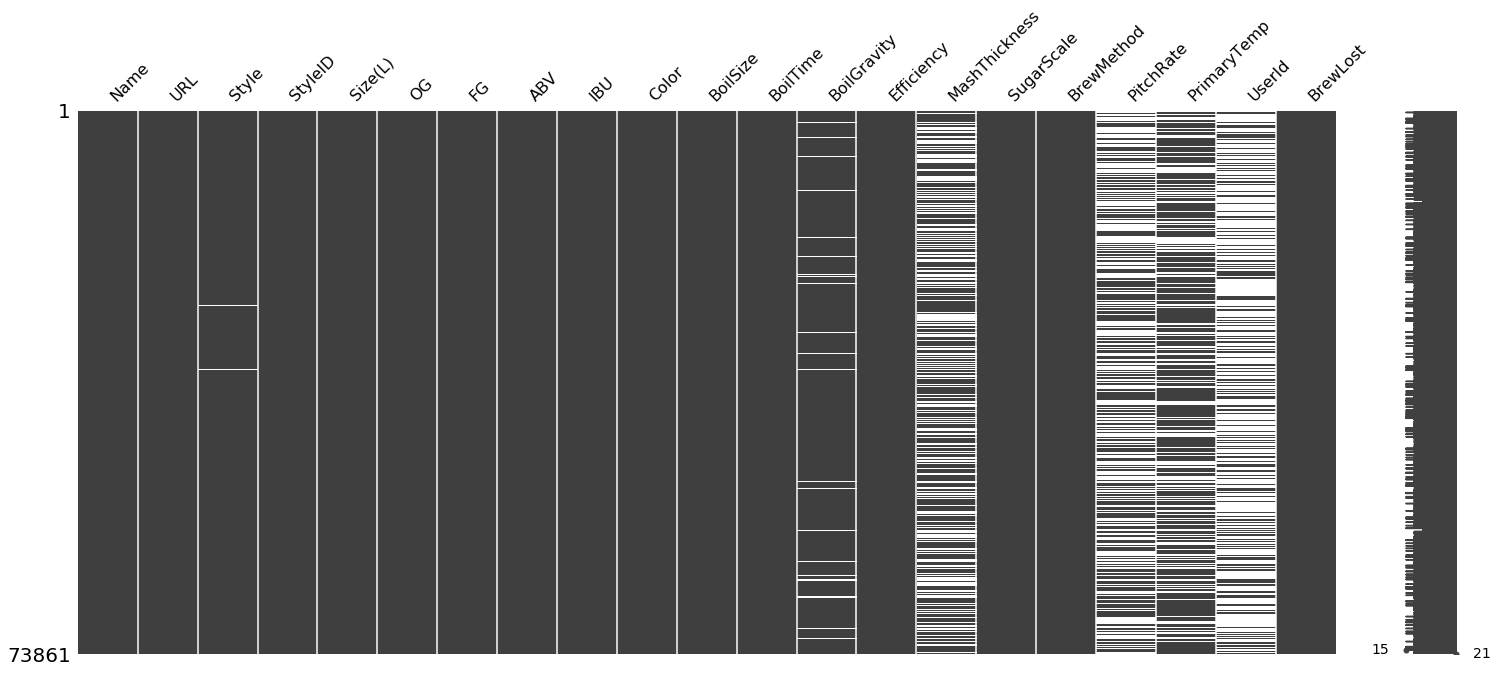

In [88]:
msno.matrix(df_beer.sample(len(df_beer)))

In [91]:
df_beer[df_beer['StyleID'] == 111]

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,UserId,BrewLost
BeerID,,,,,,,,,,,,,,,,,,,,,
39,Rochefort 8 Clone,/homebrew/recipe/view/188995/rochefort-8-clone,NaN,111,18.93,1.079,1.019,7.90,0.00,29.40,...,60,NaN,65.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,0.060
88,Zatarain's Root Beer - Non-Alcoholic keg in...,/homebrew/recipe/view/21783/zatarain-s-root-be...,NaN,111,18.93,1.046,1.013,4.27,0.00,3.99,...,0,1.077,100.0,NaN,Specific Gravity,BIAB,NaN,NaN,993.0,0.033
193,Hop Cliff,/homebrew/recipe/view/188896/hop-cliff,NaN,111,18.93,1.093,1.023,9.12,0.00,14.07,...,60,NaN,75.0,NaN,Specific Gravity,Partial Mash,NaN,NaN,NaN,0.070
348,Mosaic IPL,/homebrew/recipe/view/56751/mosaic-ipl,NaN,111,20.82,1.063,1.016,6.16,68.35,7.67,...,60,NaN,78.0,NaN,Specific Gravity,All Grain,2.00,10.00,15452.0,0.047
578,Nanny state,/homebrew/recipe/view/329814/nanny-state,NaN,111,20.00,1.008,1.006,0.30,55.43,11.39,...,60,1.006,70.0,3.00,Specific Gravity,All Grain,NaN,NaN,3053.0,0.002
817,New world XII (westvleteren 12 clone),/homebrew/recipe/view/47720/new-world-xii-west...,NaN,111,20.82,1.105,1.024,10.67,49.40,25.37,...,90,NaN,75.0,NaN,Specific Gravity,All Grain,1.00,27.78,13634.0,0.081
945,Australian IPA,/homebrew/recipe/view/10443/australian-ipa,NaN,111,18.93,1.053,1.015,5.05,46.43,9.92,...,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,651.0,0.038
1003,Maris Otter sMasH,/homebrew/recipe/view/52974/maris-otter-smash,NaN,111,23.00,1.048,1.014,4.56,31.09,5.56,...,90,NaN,70.0,NaN,Specific Gravity,BIAB,NaN,20.00,14727.0,0.034
1108,Quilter's Irish Death Clone,/homebrew/recipe/view/191213/quilter-s-irish-d...,NaN,111,18.93,1.071,1.018,6.93,0.00,18.67,...,60,NaN,75.0,1.25,Specific Gravity,All Grain,NaN,NaN,NaN,0.053
